# Naive Bayes approach

In [10]:
# %load_ext autoreload
# %autoreload 2
%matplotlib inline

import common

import numpy as np
import pandas as pd
import sklearn.dummy
import sklearn.naive_bayes

In [2]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.19966677557820808
[[0.05801982 0.05882353 0.11657545 0.23085461 0.53572659]
 [0.0601492  0.05964145 0.1207671  0.22708276 0.53235949]
 [0.05875816 0.06060366 0.11844899 0.22677753 0.53541166]
 [0.06106998 0.06032853 0.1189131  0.22682985 0.53285853]
 [0.06181894 0.0607416  0.11898854 0.2249607  0.53349022]]


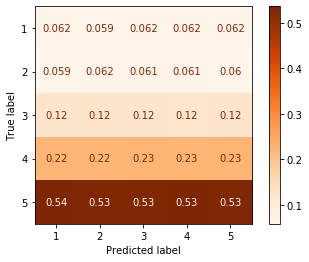

In [12]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

## Performance measure row schema

In [15]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, fit_prior='N/A', alpha='N/A')])
results_df

,sampling,representation,preprocessing,fit_prior,alpha,score
0,full,count,None,N/A,N/A,0.200496


## One multi-class combined classifier, exposed to all classes at once

In [24]:
for sampling in ['random_downsampling', 'full']:
    for representation in ['count', 'tf_idf']:
        for preprocessing in [None, 'stem']:
            for fit_prior in [False, True]:
                for alpha in np.arange(0.1, 5., .1):

                    train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        sampling, representation, preprocessing)

                    classifier = sklearn.naive_bayes.MultinomialNB(fit_prior=fit_prior, alpha=alpha)
                    classifier.fit(train_as_vec, train_targets)

                    results_df = results_df.append([
                            common.perf_row(
                                classifier, test_as_vec, test_targets,
                                'multiclass', sampling, representation, 
                                preprocessing, fit_prior=fit_prior, alpha=alpha)])

KeyError: 'stem'

In [25]:
results_df.sort_values('score', ascending=False).head(25)

,sampling,representation,preprocessing,fit_prior,alpha,score
0,random_downsampling,count,None,True,2.3,0.467289
0,random_downsampling,count,None,True,2.3,0.467289
0,random_downsampling,count,None,True,2.2,0.467215
0,random_downsampling,count,None,True,2.2,0.467215
0,random_downsampling,count,None,True,2.4,0.467039
0,random_downsampling,count,None,True,2.4,0.467039
0,random_downsampling,count,None,True,1.8,0.466962
0,random_downsampling,count,None,True,1.8,0.466962
0,random_downsampling,count,None,True,2.1,0.466958
0,random_downsampling,count,None,True,2.1,0.466958
